In [1]:
# Imports
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [143]:
# Define o caminho da imagem
face = '../testimages/test.png'

In [144]:
# Inicializa imagem
image = Image.open(face)
image_array = np.asarray(image)

# Variaveis da primeira etapa
I = image_array[:,:,:3]
p = I
radius = 4
eps = 5
factor = 5

#Execução do processo
q = cv2.ximgproc.guidedFilter(I, p, radius, eps)
Ie = q + factor*(I-q)
L0 = cv2.ximgproc.l0Smooth(Ie)

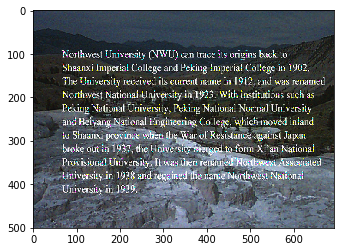

In [145]:
plt.imshow(Ie)

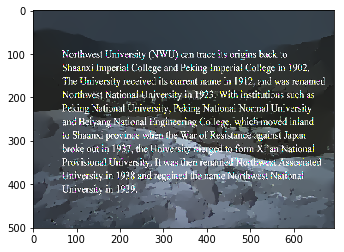

In [146]:
plt.imshow(L0)

In [147]:
#Acha o maior valor médio entre os pixels
A = np.amax(np.average(L0, axis=2))

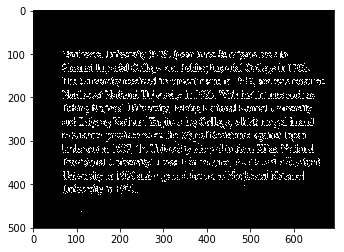

In [148]:
#Cria a mascara zerada
mask_shape = (L0.shape)
M1 = np.zeros(mask_shape[0:2])


Lap = cv2.Laplacian(L0,16)
Lap = cv2.cvtColor(Lap,cv2.COLOR_RGB2GRAY)
ret, Lap = cv2.threshold(Lap, 100, 255, cv2.THRESH_BINARY)
plt.imshow(Lap, cmap="gray")


In [159]:
# coef = 120
# for i,lines in enumerate(M1):
#     for j, pixels in enumerate(lines):
#         if((A - np.average(L0, axis=2))[i][j] < coef):
#             M1[i][j] = 255
ret, M1 = cv2.threshold(L0, 200, 255, cv2.THRESH_BINARY)

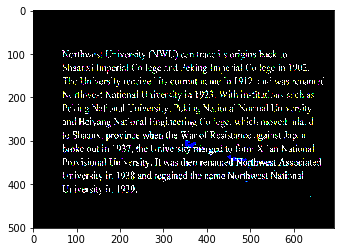

In [166]:
plt.imshow(M1)

(501, 693, 3)


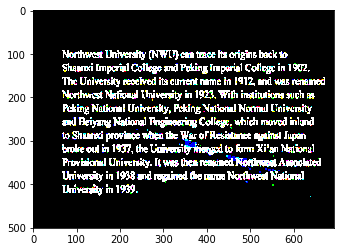

In [165]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(M1, kernel,iterations = 1)
dilation =dilation.astype(int)
plt.imshow(dilation, cmap="gray")

In [162]:
M2 = dilation & Lap
plt.imshow(M2, cmap="gray")

ValueError: operands could not be broadcast together with shapes (501,693,3) (501,693) 

In [163]:
M3 = M1 + M2
plt.imshow(M3, cmap="gray")

ValueError: operands could not be broadcast together with shapes (501,693,3) (64,64) 